In [ ]:
#!/bin/bash
# kaggle datasets download imsparsh/audio-speech-sentiment

In [1]:
import os
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import pandas as pd 
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
train_csv = pd.read_csv("audio-speech-sentiment/TRAIN.csv")
train_audio_path = 'audio-speech-sentiment/TRAIN'
test_audio_path = 'audio-speech-sentiment/TEST'

In [5]:
train_csv.head()

,Filename,Class
0,346.wav,Negative
1,163.wav,Neutral
2,288.wav,Negative
3,279.wav,Negative
4,244.wav,Negative


In [6]:
for index, row in train_csv.iterrows():
    print(index,row)

0 Filename     346.wav
Class       Negative
Name: 0, dtype: object
1 Filename    163.wav
Class       Neutral
Name: 1, dtype: object
2 Filename     288.wav
Class       Negative
Name: 2, dtype: object
3 Filename     279.wav
Class       Negative
Name: 3, dtype: object
4 Filename     244.wav
Class       Negative
Name: 4, dtype: object
5 Filename     273.wav
Class       Negative
Name: 5, dtype: object
6 Filename       5.wav
Class       Positive
Name: 6, dtype: object
7 Filename     353.wav
Class       Negative
Name: 7, dtype: object
8 Filename    145.wav
Class       Neutral
Name: 8, dtype: object
9 Filename     109.wav
Class       Positive
Name: 9, dtype: object
10 Filename    211.wav
Class       Neutral
Name: 10, dtype: object
11 Filename      38.wav
Class       Positive
Name: 11, dtype: object
12 Filename    214.wav
Class       Neutral
Name: 12, dtype: object
13 Filename      55.wav
Class       Positive
Name: 13, dtype: object
14 Filename     305.wav
Class       Negative
Name: 14, dtype: 

In [7]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs=librosa.feature.mfcc(y=audio, s_r=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

In [8]:
# !pip install resampy

In [9]:
import os  
import numpy as np  
import warnings  
from tqdm import tqdm  
import librosa  

# Suppress warnings  
warnings.filterwarnings('ignore')  

features, labels = [], []  

def extract_features(file_name):  
    try:  
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')  
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)  
        return np.mean(mfccs.T, axis=0)  
    except Exception as e:  
        print(f"Error extracting features from {file_name}: {e}")  
        return None  

print("Extracting features from audio files...")  

try:  
    for index, row in tqdm(train_csv.iterrows(), total=len(train_csv)):  
        file_path = os.path.join(train_audio_path, row["Filename"])  
        data = extract_features(file_path)  
        if data is not None:  
            features.append(data)  
            labels.append(row['Class'])  

    print("Feature extraction completed!")  
except Exception as e:  
    print(f"An error occurred during feature extraction: {e}")  
    print("Please ensure required libraries are installed:\n pip install resampy librosa numpy tqdm")

Extracting features from audio files...


100%|██████████| 250/250 [00:09<00:00, 26.07it/s]

Feature extraction completed!


In [10]:
# Print the features and label for the first file  
if features and labels:  # Check if lists are not empty  
    print("Features for the first file:", features[0])  
    print("Label for the first file:", labels[0])  
else:  
    print("No features or labels extracted.")  


Features for the first file: [-5.5827441e+02  9.8527710e+01  1.2595478e+01  2.9985909e+01
 -4.8006315e+00 -1.0264048e+01 -7.6342583e-01  3.5814877e+00
 -4.2703657e+00  8.0174871e-02 -4.2918539e+00 -1.1137313e+00
 -3.5650783e+00 -4.0965538e+00 -3.8217170e+00 -5.0323687e+00
 -2.9989564e+00  1.7852991e+00 -4.9950209e+00 -7.6959205e+00
 -2.8048794e+00 -1.8682975e+00 -7.5235667e+00 -7.4340038e+00
 -5.0325422e+00 -4.1889868e+00 -2.5506349e+00 -7.0135455e+00
 -2.6905911e+00  1.5256716e+00 -6.9262719e-01 -2.8611989e+00
 -1.7048836e+00 -3.9778700e+00 -4.0932994e+00 -4.6969547e+00
 -4.6646619e+00 -1.7943087e+00 -9.8991632e-01 -4.8744264e+00]
Label for the first file: Negative


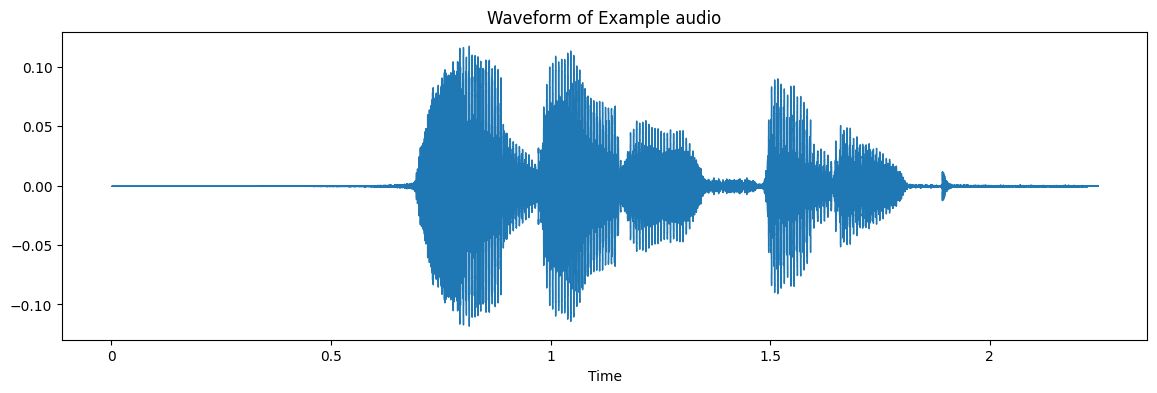

In [11]:
example_audio = os.path.join(train_audio_path, train_csv['Filename'].iloc[0])
audio, sr=librosa.load(example_audio)

plt.figure(figsize=(14,4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of Example audio")
plt.show()

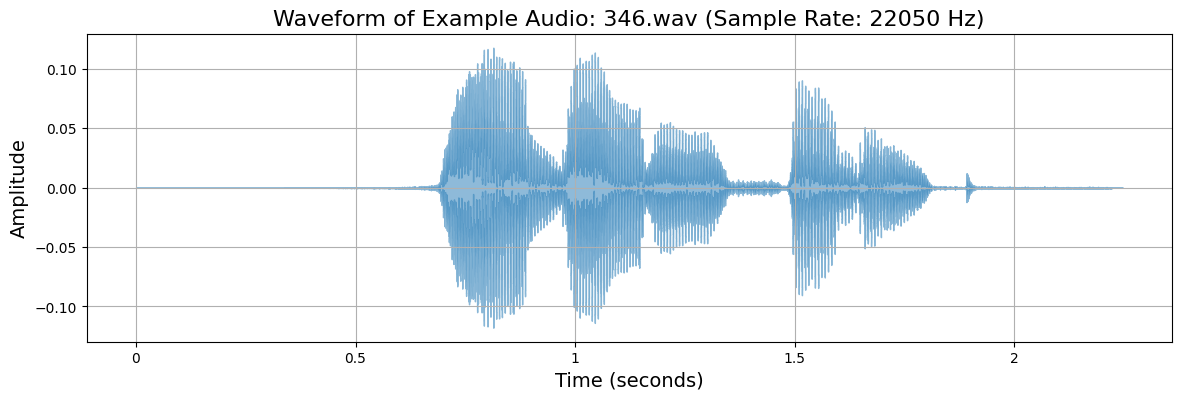

In [12]:
example_audio = os.path.join(train_audio_path, train_csv['Filename'].iloc[0])  
audio, sr = librosa.load(example_audio)  

plt.figure(figsize=(14, 4))  
librosa.display.waveshow(audio, sr=sr, alpha=0.5)  
plt.title(f"Waveform of Example Audio: {os.path.basename(example_audio)} (Sample Rate: {sr} Hz)", fontsize=16)  
plt.xlabel("Time (seconds)", fontsize=14)  
plt.ylabel("Amplitude", fontsize=14)  
plt.grid(True)   
plt.show()

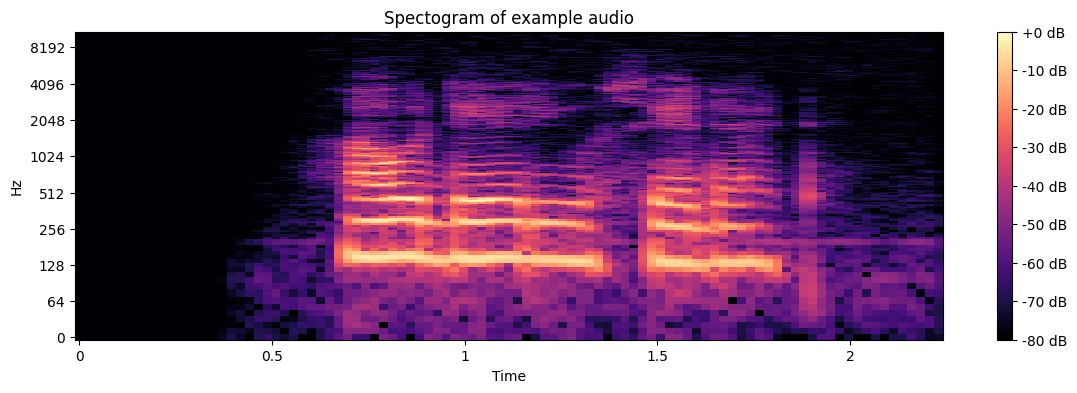

In [14]:
## Spectogram

plt.figure(figsize=(14,4))
spectogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(spectogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectogram of example audio")
plt.show()

In [16]:
x=np.array(features)
le=LabelEncoder()
y=to_categorical(le.fit_transform(labels))
y[0]

array([1., 0., 0.])

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42, test_size=0.2)

In [21]:
x_train=x_train.reshape(x_train.shape[0], 40,1,1)
x_val=x_val.reshape(x_val.shape[0], 40,1,1)

In [22]:
x_train.shape

(200, 40, 1, 1)

In [27]:
### CNN model
model = Sequential()
model.add(Conv2D(32, (3,1), activation='relu', input_shape=(40,1,1)))
model.add(MaxPooling2D(pool_size=(2,1)))

model.add(Flatten())

#Classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#Model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train model
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=32)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4182 - loss: 14.2185 - val_accuracy: 0.4400 - val_loss: 3.2568
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4288 - loss: 9.0830 - val_accuracy: 0.7200 - val_loss: 0.7233
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4802 - loss: 7.1746 - val_accuracy: 0.7000 - val_loss: 1.4318
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5962 - loss: 3.1718 - val_accuracy: 0.7600 - val_loss: 0.6866
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5625 - loss: 1.9985 - val_accuracy: 0.8800 - val_loss: 0.3258
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6169 - loss: 1.5234 - val_accuracy: 0.8600 - val_loss: 0.5089
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6449 - loss: 1.3011 - val_accuracy: 0.8600 - val_loss: 0.3229
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6842 - loss: 0.8059 - val_accuracy: 0.7600 - val_loss: 0.4399

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8917 - loss: 0.2256
Validation Loss:0.2135
Validation accuracy:0.9000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
classification_report: 
              precision    recall  f1-score   support

    Negative       0.86      0.80      0.83        15
     Neutral       1.00      1.00      1.00        20
    Positive       0.81      0.87      0.84        15

    accuracy                           0.90        50
   macro avg       0.89      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50



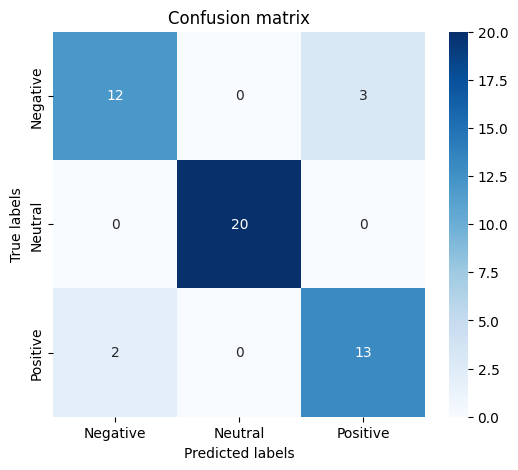

In [32]:
#model evaluation
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Loss:{loss:0.4f}")
print(f"Validation accuracy:{accuracy:0.4f}")

# make prediction
y_pred = model.predict(x_val)
y_pred_classes=np.argmax(y_pred, axis=1)  # Changed from y_val to y_pred
y_true=np.argmax(y_val, axis=1)

# Classification report
print("classification_report: ")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title("Confusion matrix")
plt.show()

In [33]:
# Prediction system
import numpy as np
import librosa 
from IPython.display import Audio

# Detection system
def predictive_sentiment(audio_path):
    feature = extract_features(audio_path)
    if feature is not None:
        feature = feature.reshape(1, 40, 1, 1)  # Reshape to match the model's input shape
        prediction = model.predict(feature)
        return le.inverse_transform([np.argmax(prediction[0])])[0]
    else:
        return "Error: Could not extract features from audio file"

In [35]:
audio_path="audio-speech-sentiment\\TEST\\25.wav"
display(Audio(audio_path))


In [36]:
predicted_label = predictive_sentiment(audio_path)
print(f"Predicted sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted sentiment: Positive


In [40]:
audio_path="audio-speech-sentiment\\TEST\\312.wav"
display(Audio(audio_path))
predicted_label = predictive_sentiment(audio_path)
print(f"Predicted sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted sentiment: Negative


In [41]:
import pickle

model.save("sentiment_cnn_model.h5")

pickle.dump(le, open('le.pkl', 'wb'))